In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def plot_mmd_energy(df, title, sortby='mmd'):
    df = df.sort_values(sortby)
    
    fig, ax1 = plt.subplots(figsize=(7.5, 5))
    
    # Make the y-axis and data for MMD.
    line1 = ax1.plot(df['mmd'], linestyle='-')
    ax1.set_ylabel('MMD', color=line1[0].get_color())
    ax1.tick_params('y', colors=line1[0].get_color())
    
    # X-axis
    # ax1.set_xlabel('Dataset')
    ax1.tick_params('x', rotation=20)

    # Make the y-axis and data for Energy.
    ax2 = ax1.twinx()
    ax2.plot([], []) # Advances color cycle
    line2 = ax2.plot(df['energy'], linestyle='-')
    ax2.set_ylabel('Energy Distance', color=line2[0].get_color())
    ax2.tick_params('y', colors=line2[0].get_color())

    plt.title(title)
    plt.savefig('figures/%s_results.jpg' % title)
    fig.tight_layout()
    plt.show()

    
def plot_line2(dfs, x_col, x_title, y_col, y_title, title, df_labels, sortby='mmd'):    
    dfs = [df.sort_values(sortby) for df in dfs]
    
    fig = plt.figure(figsize=(7.5, 5))
     
    # Make the y-axis and data for MMD.
    for df, label in zip(dfs, df_labels):
        plt.plot(df[x_col], df[y_col], linestyle='-', label=label)
    
    plt.legend()
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    
    # fig.tight_layout()
    plt.title(title)
    plt.savefig('figures/%s_results.jpg' % title)
    plt.show()
    

def plot_line(dfs, x_col, x_title, y_col, y_title, title, df_labels, sortby='mmd'):    
    dfs = [df.sort_values(sortby) for df in dfs]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7.5, 5), sharex=True, gridspec_kw = {'height_ratios':[3, 1]})
    
    # Make the AUROC line plot over MMD.
    for df, label in zip(dfs, df_labels):
        ax1.plot(df[x_col], df[y_col], linestyle='-', label=label)
    
    ax1.set_title(title)
    ax1.legend()
    ax1.set_ylabel(y_title)
    
    # Make the horizontal bar
    outliers = dfs[0].index.values
    y_pos = np.arange(len(outliers))
    mmd = dfs[0][x_col]

    ax2.barh(y_pos, mmd, align='center', color='gray')
    ax2.invert_yaxis()
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(outliers)    
    ax2.set_xlabel(x_title)
    
    # Adjust minimum x tick value
    x_min = dfs[0][x_col].min()
    x_max = dfs[0][x_col].max()
    x_lim = ax1.get_xlim()
    gap = x_lim[1] - x_max
    ax1.set_xlim(left=x_min - gap)
    
    plt.savefig('figures/%s_%s_%s.jpg' % (title, x_col, y_col))
    fig.tight_layout()
    plt.show()
    
def join(dfs):
    return pd.concat(dfs, axis=1, join='inner')

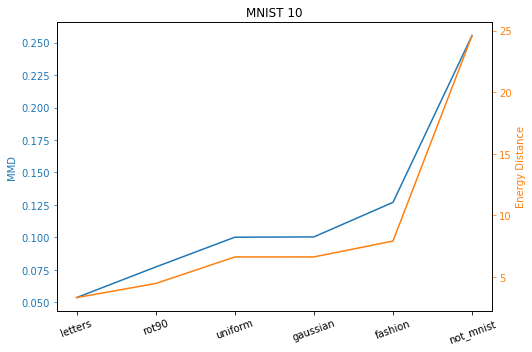

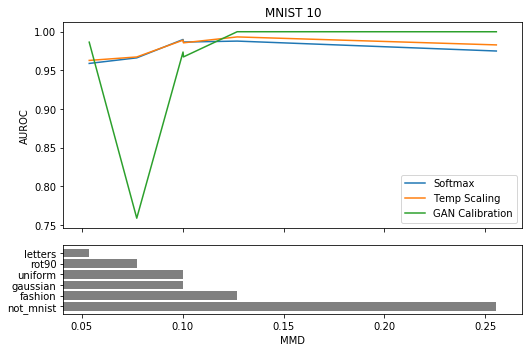

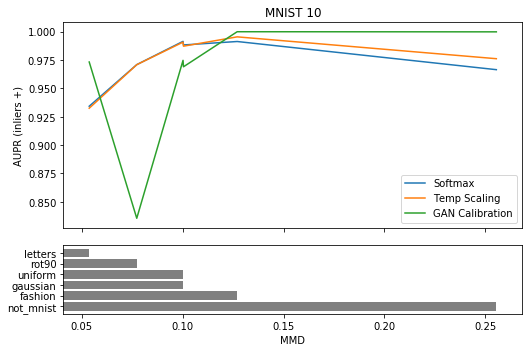

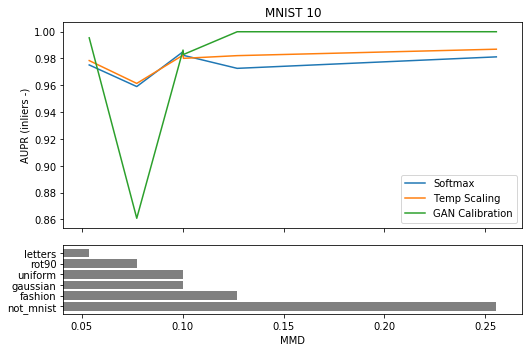

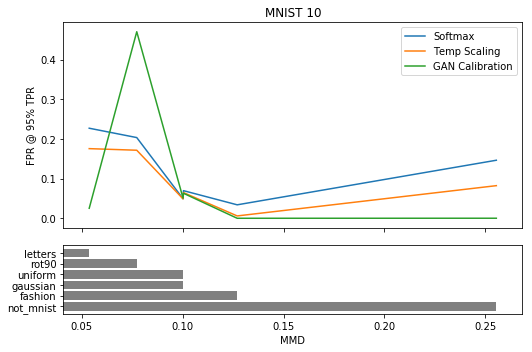

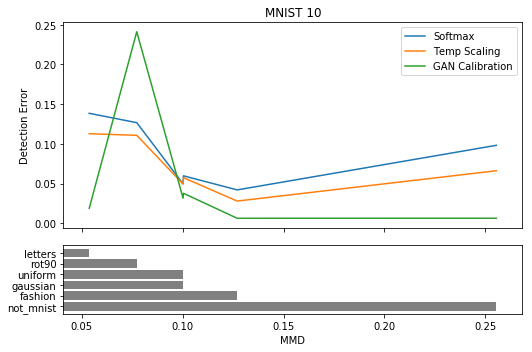

In [3]:
mnist10_mmd = pd.read_pickle('./datasets_distance/results/mnist10_mmd.pkl')
mnist10_energy = pd.read_pickle('./datasets_distance/results//mnist10_energy.pkl')
# mnist10_odin = pd.read_pickle('./mnist10_wrn28_10_odin.pkl')
mnist10_softmax = pd.read_pickle('./perturbation_temp_scaling_liang2018/results/mnist10_cnn_liang2018.pkl')
mnist10_odin = pd.read_pickle('./perturbation_temp_scaling_liang2018/results/mnist10_cnn_odin_liang2018.pkl')
mnist10_gan = pd.read_pickle('./training_confidence_calibrated_classifiers_lee2018/results/mnist10_resize_lee2018.pkl')

df1 = join([mnist10_mmd, mnist10_energy, mnist10_softmax])
df2 = join([mnist10_mmd, mnist10_odin])
df3 = join([mnist10_mmd, mnist10_gan])

# df = df.drop(['uniform', 'gaussian'])
# df = df.drop(['not_mnist'])
# df2 = df2.drop(['not_mnist'])

def plot_all(dfs, title, df_labels):
    plot_mmd_energy(dfs[0], title)
    plot_line(dfs, 'mmd', 'MMD', 'auroc', 'AUROC', title, df_labels)
    plot_line(dfs, 'mmd', 'MMD', 'aupr_in', 'AUPR (inliers +)', title, df_labels)
    plot_line(dfs, 'mmd', 'MMD', 'aupr_out', 'AUPR (inliers -)', title, df_labels)
    plot_line(dfs, 'mmd', 'MMD', 'fpr_at_95_tpr', 'FPR @ 95% TPR', title, df_labels)
    plot_line(dfs, 'mmd', 'MMD', 'detection_error', 'Detection Error', title, df_labels)

plot_all([df1, df2, df3], 'MNIST 10', ['Softmax', 'Temp Scaling', 'GAN Calibration'])

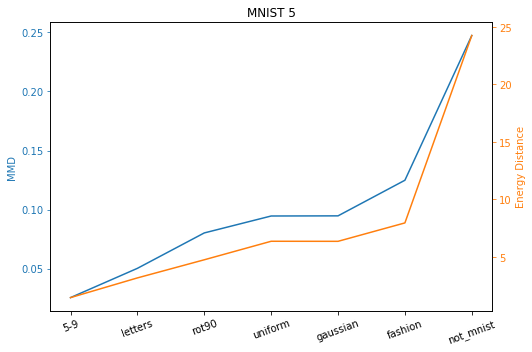

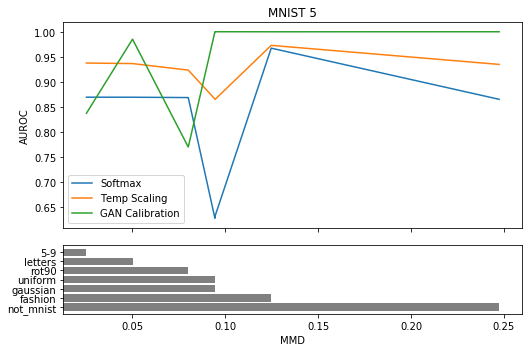

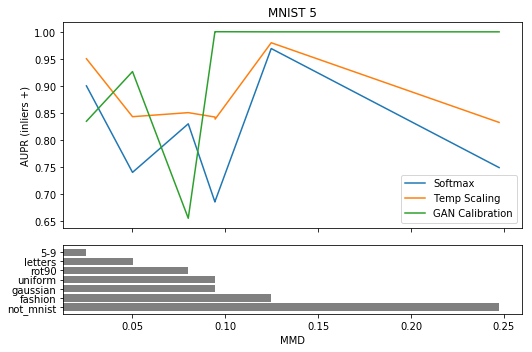

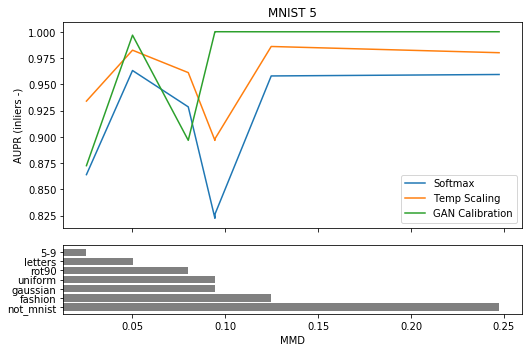

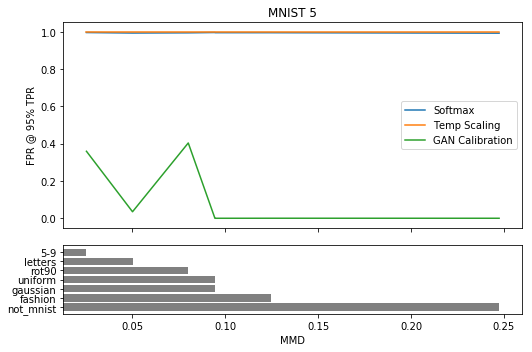

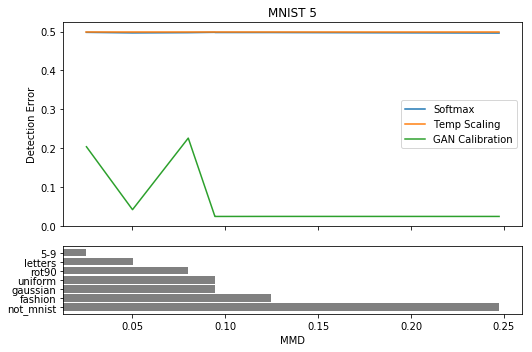

In [17]:
mnist5_mmd = pd.read_pickle('./datasets_distance/results/mnist5_mmd.pkl')
mnist5_energy = pd.read_pickle('./datasets_distance/results//mnist5_energy.pkl')
mnist5_softmax = pd.read_pickle('./perturbation_temp_scaling_liang2018/results/mnist5_cnn_liang2018.pkl')
mnist5_odin = pd.read_pickle('./perturbation_temp_scaling_liang2018/results/mnist5_cnn_odin_liang2018.pkl')
mnist5_gan = pd.read_pickle('./training_confidence_calibrated_classifiers_lee2018/results/mnist5_resize_lee2018.pkl')

df1 = join([mnist5_mmd, mnist5_energy, mnist5_softmax])
df2 = join([mnist5_mmd, mnist5_odin])
df3 = join([mnist5_mmd, mnist5_gan])

plot_all([df1, df2, df3], 'MNIST 5', ['Softmax', 'Temp Scaling', 'GAN Calibration'])

In [16]:
mnist5_energy

,energy
5-9,1.45126
letters,3.16479
rot90,4.74221
gaussian,6.34823
uniform,6.35338
fashion,7.95008
not_mnist,24.2569


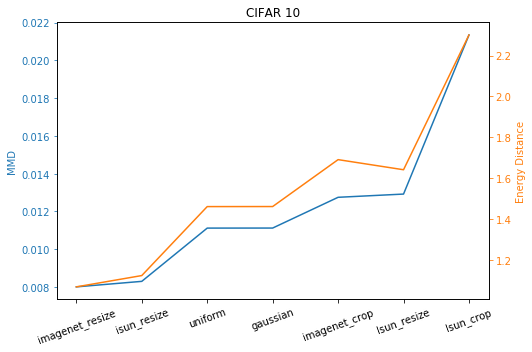

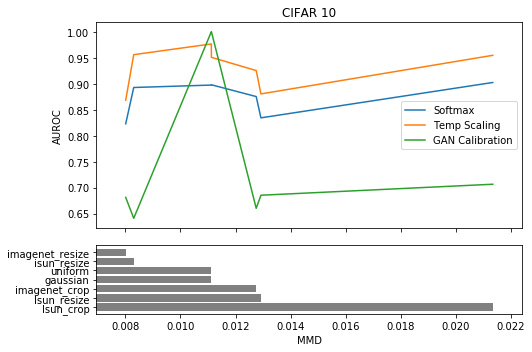

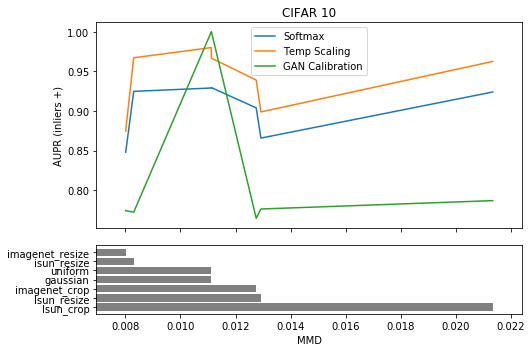

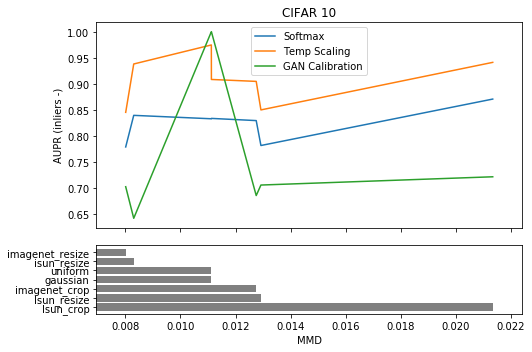

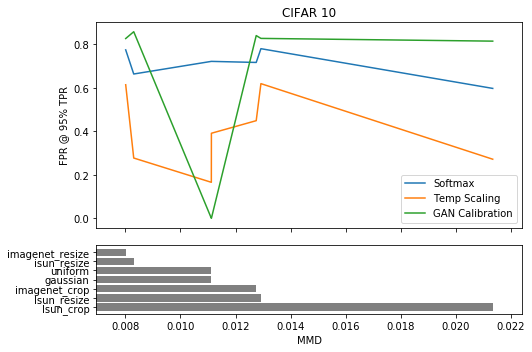

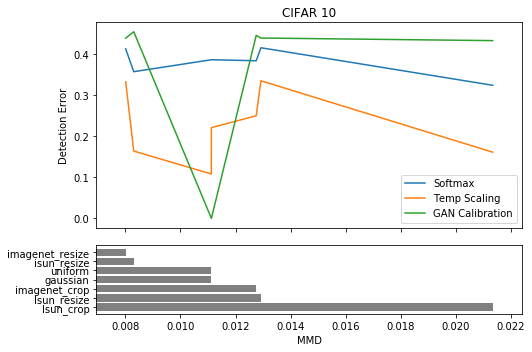

In [5]:
cifar10_mmd = pd.read_pickle('./datasets_distance/results/cifar10_mmd.pkl')
cifar10_energy = pd.read_pickle('./datasets_distance/results/cifar10_energy.pkl')
cifar10_softmax = pd.read_pickle('./perturbation_temp_scaling_liang2018/results/cifar10_wrn28_10_liang2018.pkl')
cifar10_odin = pd.read_pickle('./perturbation_temp_scaling_liang2018/results/cifar10_wrn28_10_odin_liang2018.pkl')
cifar10_gan = pd.read_pickle('./training_confidence_calibrated_classifiers_lee2018/results/cifar10_lee2018.pkl')

df1 = join([cifar10_mmd, cifar10_energy, cifar10_softmax])
df2 = join([cifar10_mmd, cifar10_energy, cifar10_odin])
df3 = join([cifar10_mmd, cifar10_energy, cifar10_gan])
# df = df.drop(['uniform', 'gaussian'])

plot_all([df1, df2, df3], 'CIFAR 10', ['Softmax', 'Temp Scaling', 'GAN Calibration'])

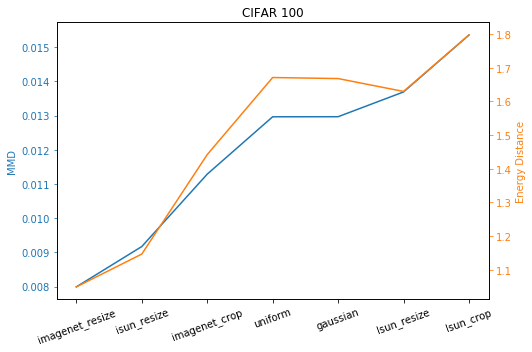

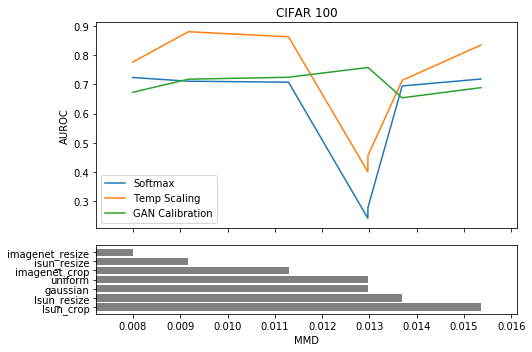

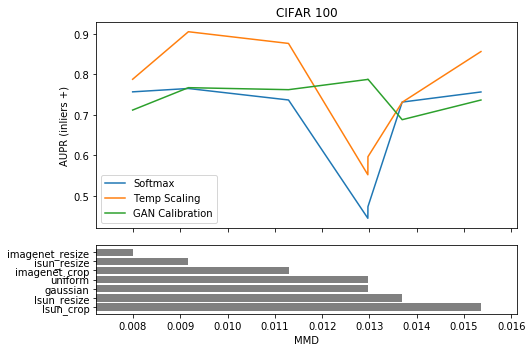

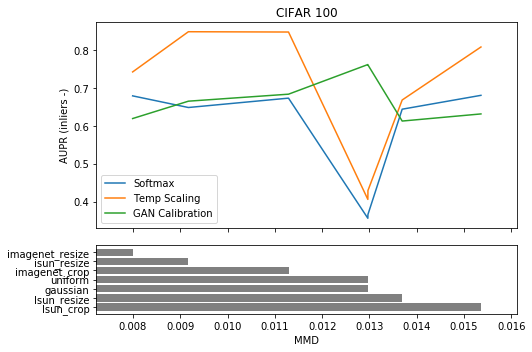

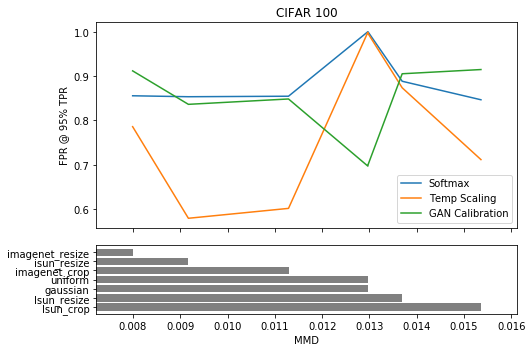

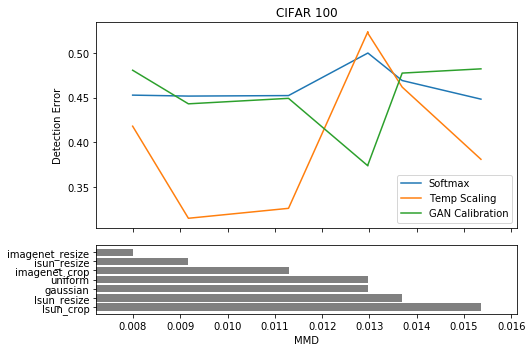

In [6]:
cifar100_mmd = pd.read_pickle('./datasets_distance/results/cifar100_mmd.pkl')
cifar100_energy = pd.read_pickle('./datasets_distance/results/cifar100_energy.pkl')
cifar100_softmax = pd.read_pickle('./perturbation_temp_scaling_liang2018/results/cifar100_wrn28_10_liang2018.pkl')
cifar100_odin = pd.read_pickle('./perturbation_temp_scaling_liang2018/results/cifar100_wrn28_10_odin_liang2018.pkl')
cifar100_gan = pd.read_pickle('./training_confidence_calibrated_classifiers_lee2018/results/cifar100_lee2018.pkl')

df1 = join([cifar100_mmd, cifar100_energy, cifar100_softmax])
df2 = join([cifar100_mmd, cifar100_energy, cifar100_odin])
df3 = join([cifar100_mmd, cifar100_energy, cifar100_gan])
# df = df.drop(['uniform', 'gaussian'])

plot_all([df1, df2, df3], 'CIFAR 100', ['Softmax', 'Temp Scaling', 'GAN Calibration'])

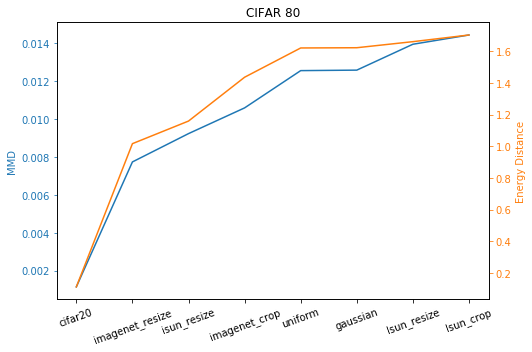

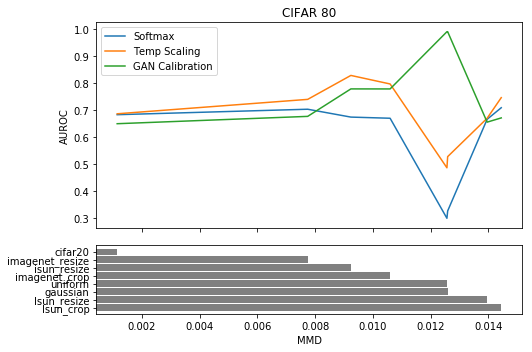

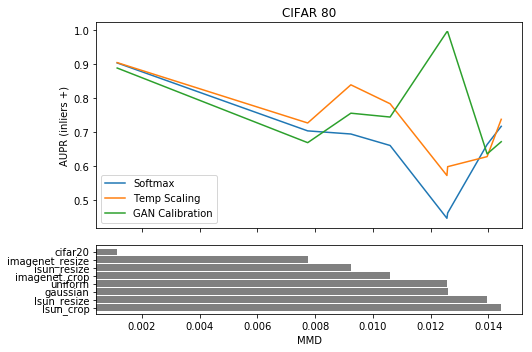

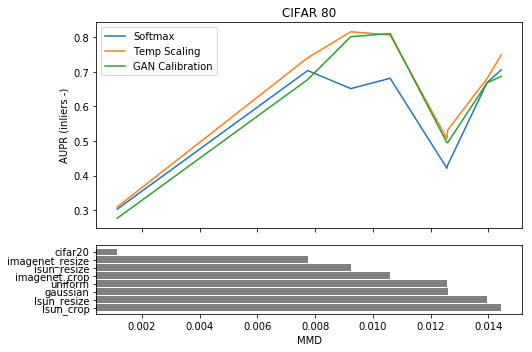

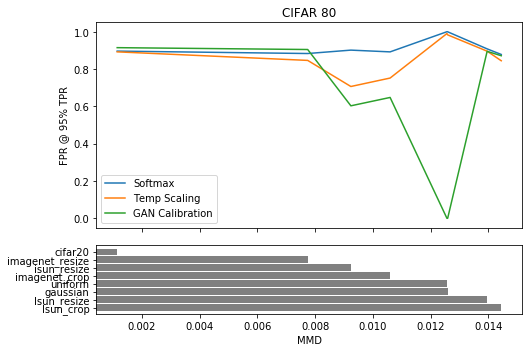

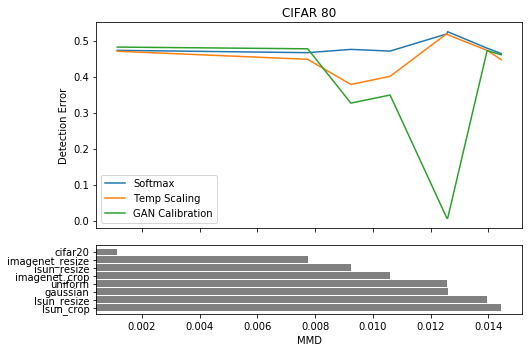

In [7]:
cifar80_mmd = pd.read_pickle('./datasets_distance/results/cifar80_mmd.pkl')
cifar80_energy = pd.read_pickle('./datasets_distance/results/cifar80_energy.pkl')
cifar80_softmax = pd.read_pickle('./perturbation_temp_scaling_liang2018/results/cifar80_wrn28_10_liang2018.pkl')
cifar80_odin = pd.read_pickle('./perturbation_temp_scaling_liang2018/results/cifar80_wrn28_10_odin_liang2018.pkl')
cifar80_gan = pd.read_pickle('./training_confidence_calibrated_classifiers_lee2018/results/cifar80_lee2018.pkl')

df1 = join([cifar80_mmd, cifar80_energy, cifar80_softmax])
df2 = join([cifar80_mmd, cifar80_energy, cifar80_odin])
df3 = join([cifar80_mmd, cifar80_energy, cifar80_gan])
# df = df.drop(['uniform', 'gaussian'])

plot_all([df1, df2, df3], 'CIFAR 80', ['Softmax', 'Temp Scaling', 'GAN Calibration'])